Loading face images from archive folder...
Loaded 410 images of 41 different people
Preprocessing images...
Applying PCA with 150 components...
Variance explained by 150 components: 0.9870

--- Training SVM with Grid Search ---
Training SVM with grid search...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
Training time: 2.49 seconds

--- Training SVM without Grid Search ---
Training SVM without grid search...
SVM trained without grid search in 0.15 seconds

--- Evaluating SVM with Grid Search ---
Evaluating model...
Accuracy: 0.9634
F1 Score: 0.9594
Prediction time: 0.0033 seconds

--- Evaluating SVM without Grid Search ---
Evaluating model...
Accuracy: 0.6220
F1 Score: 0.6145
Prediction time: 0.0062 seconds

Comparison of PCA + SVM with and without Grid Search:
------------------------------------------------------------
Metric                    With Grid Search     Without Grid Search 
-------------------

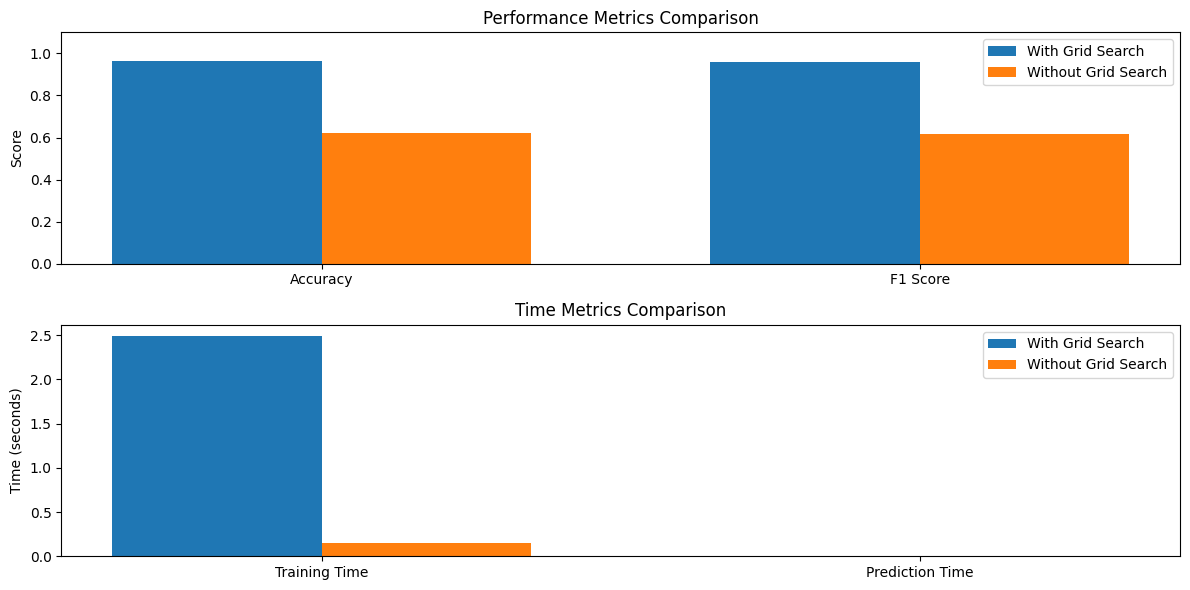


Comparison plot saved as 'pca_grid_search_comparison.png'


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score
from time import time
from sklearn.model_selection import GridSearchCV
from face_identification import (
    load_olivetti_dataset,
    preprocess_images,
    train_svm_with_grid_search,
    evaluate_model,
    apply_pca
)

def train_svm_without_grid_search(X_train, y_train, kernel="rbf", C=1.0, gamma=0.001):
    """
    Train an SVM classifier without grid search
    """
    print("Training SVM without grid search...")
    start_time = time()
    model = SVC(kernel=kernel, C=C, gamma=gamma, probability=True)
    model.fit(X_train, y_train)
    training_time = time() - start_time
    print(f"SVM trained without grid search in {training_time:.2f} seconds")
    return model, training_time

def compare_pca_with_and_without_grid_search():
    """
    Compare PCA + SVM with and without Grid Search
    """
    # Load and preprocess dataset
    X, y, X_images = load_olivetti_dataset()
    X_preprocessed = preprocess_images(X, X_images)

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_preprocessed, y, test_size=0.2, random_state=42
    )

    # Apply PCA
    X_train_pca, pca_model = apply_pca(X_train, n_components=150)
    X_test_pca = pca_model.transform(X_test)

    # Train SVM with Grid Search
    print("\n--- Training SVM with Grid Search ---")
    svm_with_grid, grid_training_time = train_svm_with_grid_search(X_train_pca, y_train)

    # Train SVM without Grid Search
    print("\n--- Training SVM without Grid Search ---")
    svm_without_grid, no_grid_training_time = train_svm_without_grid_search(X_train_pca, y_train)

    # Evaluate both models
    print("\n--- Evaluating SVM with Grid Search ---")
    grid_accuracy, grid_f1, grid_prediction_time, _ = evaluate_model(svm_with_grid, X_test_pca, y_test)

    print("\n--- Evaluating SVM without Grid Search ---")
    no_grid_accuracy, no_grid_f1, no_grid_prediction_time, _ = evaluate_model(svm_without_grid, X_test_pca, y_test)

    # Compare results
    methods = ['With Grid Search', 'Without Grid Search']
    metrics = {
        'Training Time (s)': [grid_training_time, no_grid_training_time],
        'Prediction Time (s)': [grid_prediction_time, no_grid_prediction_time],
        'Accuracy': [grid_accuracy, no_grid_accuracy],
        'F1 Score': [grid_f1, no_grid_f1]
    }

    print("\nComparison of PCA + SVM with and without Grid Search:")
    print("-" * 60)
    print(f"{'Metric':<25} {'With Grid Search':<20} {'Without Grid Search':<20}")
    print("-" * 60)
    for metric, values in metrics.items():
        print(f"{metric:<25} {values[0]:<20.4f} {values[1]:<20.4f}")
    print("-" * 60)

    # Plot comparison
    plt.figure(figsize=(12, 6))

    # Plot accuracy and F1 score
    plt.subplot(2, 1, 1)
    performance_metrics = ['Accuracy', 'F1 Score']
    performance_values = [
        [metrics['Accuracy'][0], metrics['F1 Score'][0]],  # With Grid Search
        [metrics['Accuracy'][1], metrics['F1 Score'][1]]   # Without Grid Search
    ]
    x = np.arange(len(performance_metrics))
    width = 0.35
    plt.bar(x - width/2, performance_values[0], width, label='With Grid Search')
    plt.bar(x + width/2, performance_values[1], width, label='Without Grid Search')
    plt.ylabel('Score')
    plt.title('Performance Metrics Comparison')
    plt.xticks(x, performance_metrics)
    plt.ylim(0, 1.1)
    plt.legend()

    # Plot time metrics
    plt.subplot(2, 1, 2)
    time_metrics = ['Training Time', 'Prediction Time']
    time_values = [
        [metrics['Training Time (s)'][0], metrics['Prediction Time (s)'][0]],  # With Grid Search
        [metrics['Training Time (s)'][1], metrics['Prediction Time (s)'][1]]   # Without Grid Search
    ]
    x = np.arange(len(time_metrics))
    plt.bar(x - width/2, time_values[0], width, label='With Grid Search')
    plt.bar(x + width/2, time_values[1], width, label='Without Grid Search')
    plt.ylabel('Time (seconds)')
    plt.title('Time Metrics Comparison')
    plt.xticks(x, time_metrics)
    plt.legend()

    plt.tight_layout()
    plt.savefig('pca_grid_search_comparison.png')
    plt.show()
    plt.close()
    print("\nComparison plot saved as 'pca_grid_search_comparison.png'")

if __name__ == "__main__":
    compare_pca_with_and_without_grid_search()

Loading face images from archive folder...
Loaded 410 images of 41 different people

--- Extracting HOG features ---
HOG features extracted: 1764 features per image
HOG feature extraction time: 5.60 seconds

--- Training SVM with Grid Search ---
Training SVM with grid search...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
Training time: 10.72 seconds

--- Training SVM without Grid Search ---
Training SVM without grid search...
SVM trained without grid search in 0.69 seconds

--- Evaluating SVM with Grid Search ---
Evaluating model...
Accuracy: 0.9500
F1 Score: 0.9333
Prediction time: 0.0100 seconds

--- Evaluating SVM without Grid Search ---
Evaluating model...
Accuracy: 0.9250
F1 Score: 0.9042
Prediction time: 0.0177 seconds

Comparison of HOG + SVM with and without Grid Search:
------------------------------------------------------------
Metric                    With Grid Search     Without Grid Search 


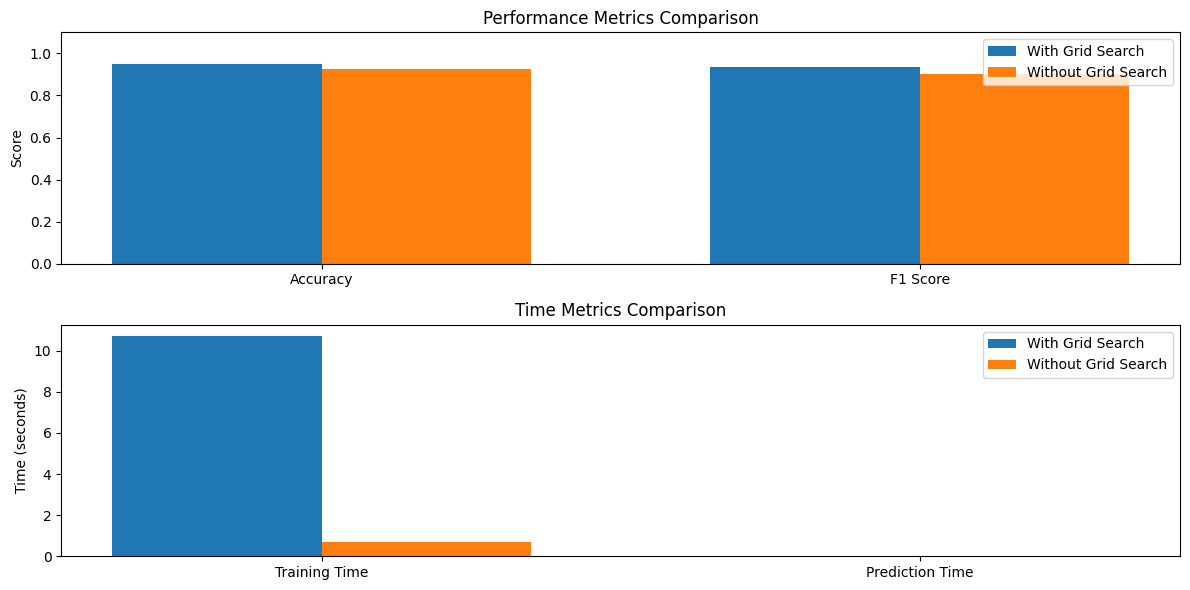


Comparison plot saved as 'hog_grid_search_comparison.png'


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from time import time
from sklearn.model_selection import GridSearchCV
from face_identification import (
    load_olivetti_dataset,
    preprocess_images,
    extract_hog_features,
    train_svm_with_grid_search,
    evaluate_model
)

def train_svm_without_grid_search(X_train, y_train, kernel="rbf", C=1.0, gamma=0.001):
    """
    Train an SVM classifier without grid search
    """
    print("Training SVM without grid search...")
    start_time = time()
    model = SVC(kernel=kernel, C=C, gamma=gamma, probability=True)
    model.fit(X_train, y_train)
    training_time = time() - start_time
    print(f"SVM trained without grid search in {training_time:.2f} seconds")
    return model, training_time

def compare_hog_with_and_without_grid_search():
    """
    Compare HOG + SVM with and without Grid Search
    """
    # Load and preprocess dataset
    X, y, X_images = load_olivetti_dataset()

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = [], [], [], []
    X_images_train, X_images_test = [], []

    # Split data by person (9 images for training, 1 for testing)
    for person_id in range(40):  # 40 different people in the dataset
        person_indices = np.where(y == person_id)[0]
        np.random.shuffle(person_indices)

        # Select 9 images for training and 1 for testing
        train_indices = person_indices[:9]
        test_indices = person_indices[9:]

        X_train.extend(X[train_indices])
        X_test.extend(X[test_indices])
        y_train.extend(y[train_indices])
        y_test.extend(y[test_indices])
        X_images_train.extend(X_images[train_indices])
        X_images_test.extend(X_images[test_indices])

    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    X_images_train = np.array(X_images_train)
    X_images_test = np.array(X_images_test)

    # Extract HOG features
    print("\n--- Extracting HOG features ---")
    start_time = time()
    X_train_hog = extract_hog_features(X_images_train)
    X_test_hog = extract_hog_features(X_images_test)
    hog_feature_time = time() - start_time
    print(f"HOG features extracted: {X_train_hog.shape[1]} features per image")
    print(f"HOG feature extraction time: {hog_feature_time:.2f} seconds")

    # Train SVM with Grid Search
    print("\n--- Training SVM with Grid Search ---")
    svm_with_grid, grid_training_time = train_svm_with_grid_search(X_train_hog, y_train)

    # Train SVM without Grid Search
    print("\n--- Training SVM without Grid Search ---")
    svm_without_grid, no_grid_training_time = train_svm_without_grid_search(X_train_hog, y_train)

    # Evaluate both models
    print("\n--- Evaluating SVM with Grid Search ---")
    grid_accuracy, grid_f1, grid_prediction_time, _ = evaluate_model(svm_with_grid, X_test_hog, y_test)

    print("\n--- Evaluating SVM without Grid Search ---")
    no_grid_accuracy, no_grid_f1, no_grid_prediction_time, _ = evaluate_model(svm_without_grid, X_test_hog, y_test)

    # Compare results
    methods = ['With Grid Search', 'Without Grid Search']
    metrics = {
        'Training Time (s)': [grid_training_time, no_grid_training_time],
        'Prediction Time (s)': [grid_prediction_time, no_grid_prediction_time],
        'Accuracy': [grid_accuracy, no_grid_accuracy],
        'F1 Score': [grid_f1, no_grid_f1]
    }

    print("\nComparison of HOG + SVM with and without Grid Search:")
    print("-" * 60)
    print(f"{'Metric':<25} {'With Grid Search':<20} {'Without Grid Search':<20}")
    print("-" * 60)
    for metric, values in metrics.items():
        print(f"{metric:<25} {values[0]:<20.4f} {values[1]:<20.4f}")
    print("-" * 60)

    # Plot comparison
    plt.figure(figsize=(12, 6))

    # Plot accuracy and F1 score
    plt.subplot(2, 1, 1)
    performance_metrics = ['Accuracy', 'F1 Score']
    performance_values = [
        [metrics['Accuracy'][0], metrics['F1 Score'][0]],  # With Grid Search
        [metrics['Accuracy'][1], metrics['F1 Score'][1]]   # Without Grid Search
    ]
    x = np.arange(len(performance_metrics))
    width = 0.35
    plt.bar(x - width/2, performance_values[0], width, label='With Grid Search')
    plt.bar(x + width/2, performance_values[1], width, label='Without Grid Search')
    plt.ylabel('Score')
    plt.title('Performance Metrics Comparison')
    plt.xticks(x, performance_metrics)
    plt.ylim(0, 1.1)
    plt.legend()

    # Plot time metrics
    plt.subplot(2, 1, 2)
    time_metrics = ['Training Time', 'Prediction Time']
    time_values = [
        [metrics['Training Time (s)'][0], metrics['Prediction Time (s)'][0]],  # With Grid Search
        [metrics['Training Time (s)'][1], metrics['Prediction Time (s)'][1]]   # Without Grid Search
    ]
    x = np.arange(len(time_metrics))
    plt.bar(x - width/2, time_values[0], width, label='With Grid Search')
    plt.bar(x + width/2, time_values[1], width, label='Without Grid Search')
    plt.ylabel('Time (seconds)')
    plt.title('Time Metrics Comparison')
    plt.xticks(x, time_metrics)
    plt.legend()

    plt.tight_layout()
    plt.savefig('hog_grid_search_comparison.png')
    plt.show()
    plt.close()
    print("\nComparison plot saved as 'hog_grid_search_comparison.png'")

if __name__ == "__main__":
    compare_hog_with_and_without_grid_search()

Loading face images from archive folder...
Loaded 410 images of 41 different people
Preprocessing images...
Applying PCA with 10 components...
Cumulative variance for 10 components: 0.6722
Applying PCA with 30 components...
Cumulative variance for 30 components: 0.8462
Applying PCA with 50 components...
Cumulative variance for 50 components: 0.9090
Applying PCA with 70 components...
Cumulative variance for 70 components: 0.9404
Applying PCA with 90 components...
Cumulative variance for 90 components: 0.9588
Applying PCA with 110 components...
Cumulative variance for 110 components: 0.9703
Applying PCA with 130 components...
Cumulative variance for 130 components: 0.9783
Applying PCA with 150 components...
Cumulative variance for 150 components: 0.9840


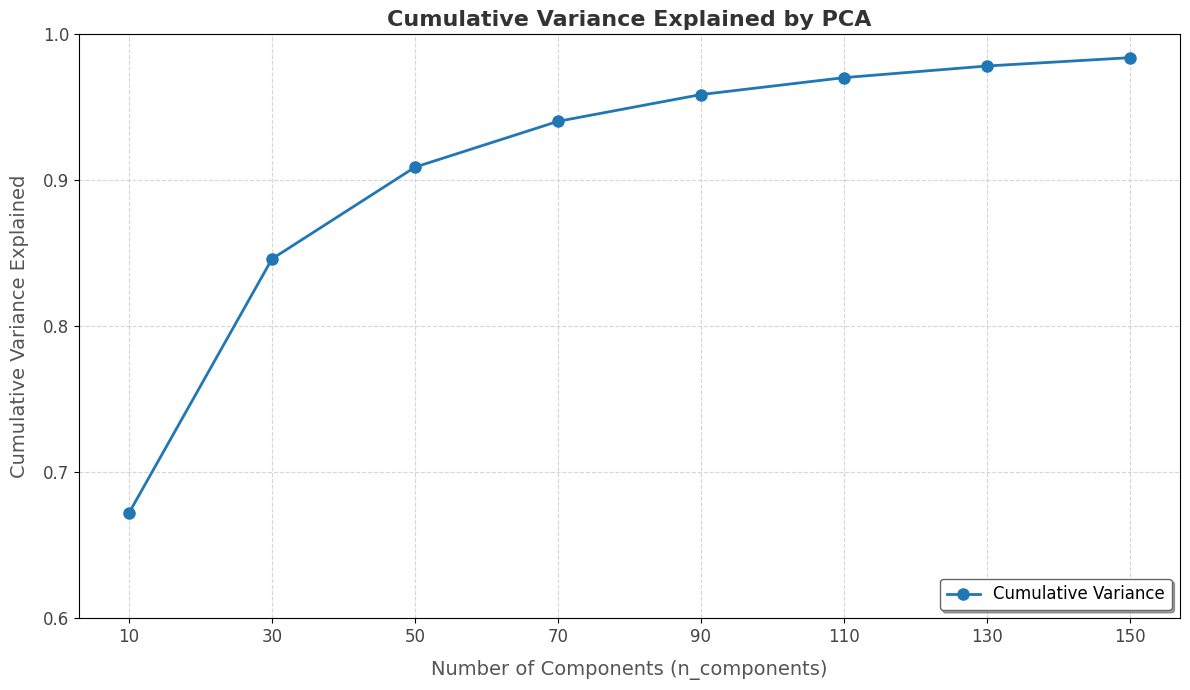


Plot saved as 'pca_cumulative_variance_plot_enhanced.png'


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from face_identification import load_olivetti_dataset, preprocess_images

def plot_cumulative_variance():
    """
    Plot cumulative variance explained by PCA with different n_components
    """
    # Load and preprocess dataset
    X, y, X_images = load_olivetti_dataset()
    X_preprocessed = preprocess_images(X, X_images)

    # Define n_components range
    n_components_range = range(10, 151, 20)

    # Store cumulative variance for each n_components
    cumulative_variances = []

    for n_components in n_components_range:
        print(f"Applying PCA with {n_components} components...")
        pca = PCA(n_components=n_components)
        pca.fit(X_preprocessed)
        
        # Calculate cumulative variance
        variance_ratio = pca.explained_variance_ratio_
        cumulative_variance = np.cumsum(variance_ratio)[-1]
        cumulative_variances.append(cumulative_variance)
        print(f"Cumulative variance for {n_components} components: {cumulative_variance:.4f}")

    # Plot cumulative variance
    plt.figure(figsize=(12, 7))
    plt.plot(
        n_components_range,
        cumulative_variances,
        marker='o',
        linestyle='-',
        color='#1f77b4',
        linewidth=2,
        markersize=8,
        label='Cumulative Variance'
    )
    plt.title('Cumulative Variance Explained by PCA', fontsize=16, fontweight='bold', color='#333333')
    plt.xlabel('Number of Components (n_components)', fontsize=14, labelpad=10, color='#555555')
    plt.ylabel('Cumulative Variance Explained', fontsize=14, labelpad=10, color='#555555')
    plt.grid(True, linestyle='--', alpha=0.6, color='#bbbbbb')
    plt.xticks(n_components_range, fontsize=12, color='#444444')
    plt.yticks(np.linspace(0.6, 1.0, 5), fontsize=12, color='#444444')
    plt.ylim(0.6, 1.0)
    plt.legend(fontsize=12, loc='lower right', frameon=True, shadow=True, edgecolor='#666666')
    plt.tight_layout()
    plt.savefig('pca_cumulative_variance_plot_enhanced.png', dpi=300)
    plt.show()
    print("\nPlot saved as 'pca_cumulative_variance_plot_enhanced.png'")

if __name__ == "__main__":
    plot_cumulative_variance()

Loading face images from archive folder...
Loaded 410 images of 41 different people
Preprocessing images...
Applying PCA with 150 components...
Variance ratios for 150 components calculated.


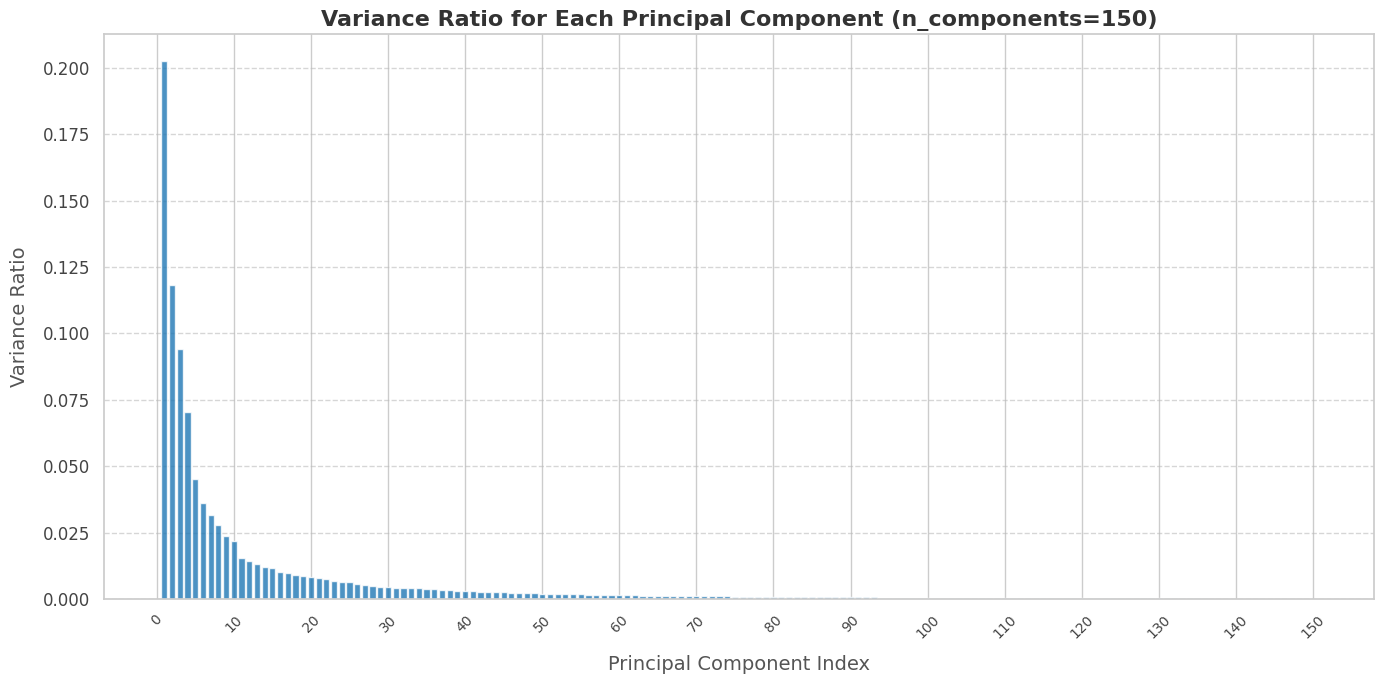


Bar chart saved as 'pca_variance_ratio_barplot_no_border.png'


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from face_identification import load_olivetti_dataset, preprocess_images

def plot_variance_ratio_barplot():
    """
    Plot variance ratio as a bar chart for n_components=150
    """
    # Load and preprocess dataset
    X, y, X_images = load_olivetti_dataset()
    X_preprocessed = preprocess_images(X, X_images)

    # Apply PCA with n_components=150
    n_components = 150
    print(f"Applying PCA with {n_components} components...")
    pca = PCA(n_components=n_components)
    pca.fit(X_preprocessed)
    
    # Extract variance ratio
    variance_ratios = pca.explained_variance_ratio_
    print(f"Variance ratios for {n_components} components calculated.")

    # Plot variance ratio as a bar chart
    plt.figure(figsize=(14, 7))
    x_ticks = np.arange(1, n_components + 1)
    plt.bar(x_ticks, variance_ratios, color='#1f77b4', alpha=0.8)  # Removed edgecolor
    plt.title('Variance Ratio for Each Principal Component (n_components=150)', fontsize=16, fontweight='bold', color='#333333')
    plt.xlabel('Principal Component Index', fontsize=14, labelpad=10, color='#555555')
    plt.ylabel('Variance Ratio', fontsize=14, labelpad=10, color='#555555')
    plt.xticks(np.arange(0, n_components + 1, 10), fontsize=10, rotation=45, color='#444444')
    plt.yticks(fontsize=12, color='#444444')
    plt.grid(axis='y', linestyle='--', alpha=0.6, color='#bbbbbb')
    plt.tight_layout()
    plt.savefig('pca_variance_ratio_barplot_no_border.png', dpi=300)
    plt.show()
    print("\nBar chart saved as 'pca_variance_ratio_barplot_no_border.png'")

if __name__ == "__main__":
    plot_variance_ratio_barplot()